In [11]:
from scipy import integrate
import numpy as np

def f(x):
    return 3*x**2+5*x-2

a = 0
b = 0.57736

def solver():
    solutions = []
    for i in range(-100,100):
        i = i/10
        if f(i) == 0:
            solutions.append(i)
    return solutions

def integral_1(a,b):
    if round(integrate.quad(f, a, b)[0],2) == 1.0:
        integ = True
    else:
        integ = False
    return integ

def positivity(a,b):
    a = round(a)
    b = round(b)
    pos = True
    for i in range(a,b):
        if f(i) < 0:
            pos = False       
    return pos

def is_prime(n: int):
    if n <= 3:
        return n > 1
    if n % 2 == 0 or n % 3 == 0:
        return False
    limit = int(math.sqrt(n))
    for i in range(5, limit+1, 6):
        if n % i == 0 or n % (i+2) == 0:
            return False
    return True

def modularity(n: int):
    modul = []
    for i in range(1,n):
        if n%i == 0:
            modul.append(i)
        else:
            next
    return modul


In [12]:
print(integral_1(a,b))
print(positivity(a,b))
print(modularity(52))
solver()

False
False
[1, 2, 4, 13, 26]


[-2.0]

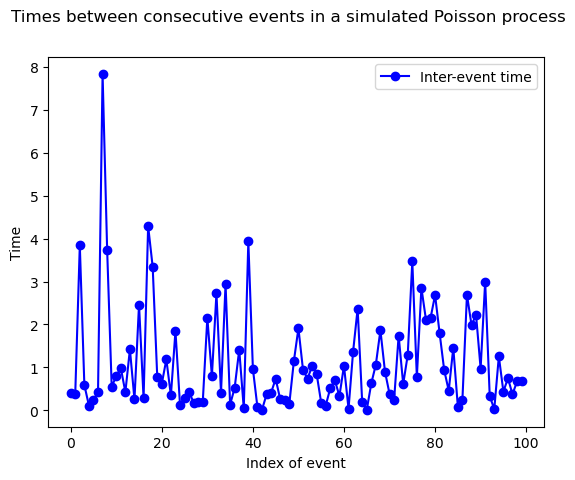

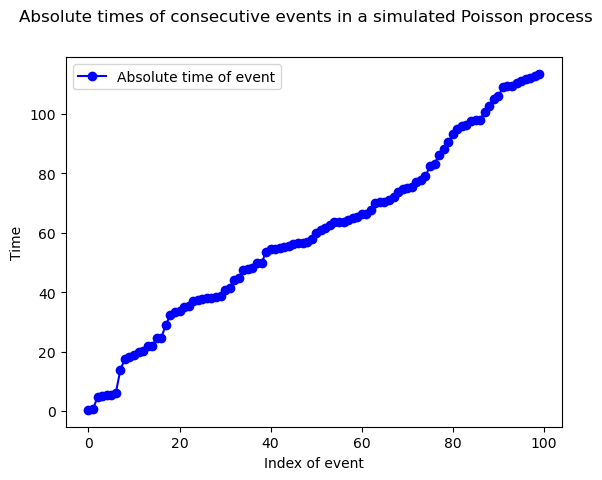

INTERVAL_NUM,NUM_EVENTS


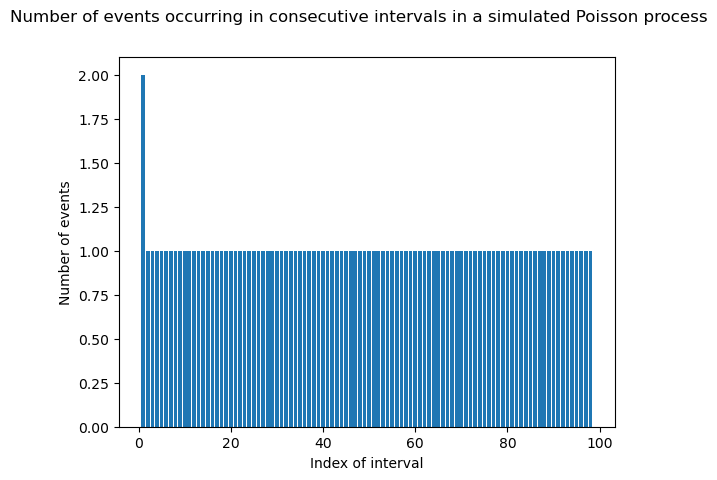

In [16]:
import random
import math
import matplotlib.pyplot as plt

_lambda = 1
_num_events = 100
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

#print('EVENT_NUM,INTER_EVENT_T,EVENT_T')

for i in range(_num_events):
	_event_num.append(i)
	#Get a random probability value from the uniform distribution's PDF
	n = random.random()

	#Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
	_inter_event_time = (-math.log(1.0 - n) / _lambda)
	_inter_event_times.append(_inter_event_time)

	#Add the inter-event time to the running sum to get the next absolute event time
	_event_time = _event_time + _inter_event_time
	_event_times.append(_event_time)

	#print it all out
	#print(str(i) +',' + str(_inter_event_time) + ',' + str(_event_time))

#plot the inter-event times
fig = plt.figure()
fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()


#plot the absolute event times
fig = plt.figure()
fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _event_times, 'bo-', label='Absolute time of event')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()

_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('INTERVAL_NUM,NUM_EVENTS')

for i in range(len(_event_times)):
	_event_time = _event_times[i]
	if _event_time <= _interval_num:
		_num_events += 1
	else:
		_interval_nums.append(_interval_num)
		_num_events_in_interval.append(_num_events)

		#print(str(_interval_num) +',' + str(_num_events))

		_interval_num += 1

		_num_events = 1

#print the mean number of events per unit time
#print(statistics.mean(_num_events_in_interval))

#plot the number of events in consecutive intervals
fig = plt.figure()
fig.suptitle('Number of events occurring in consecutive intervals in a simulated Poisson process')
plt.bar(_interval_nums, _num_events_in_interval)
plt.xlabel('Index of interval')
plt.ylabel('Number of events')
plt.show()

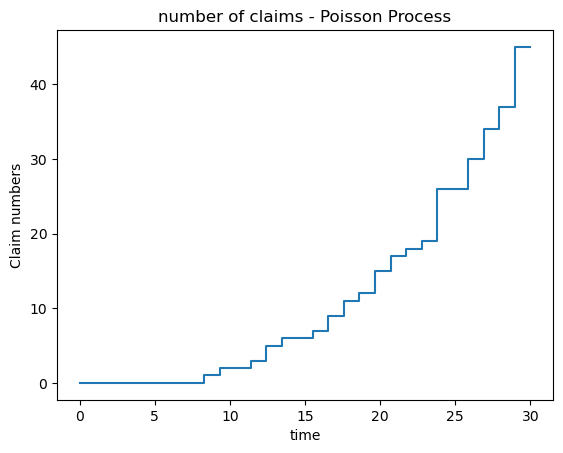

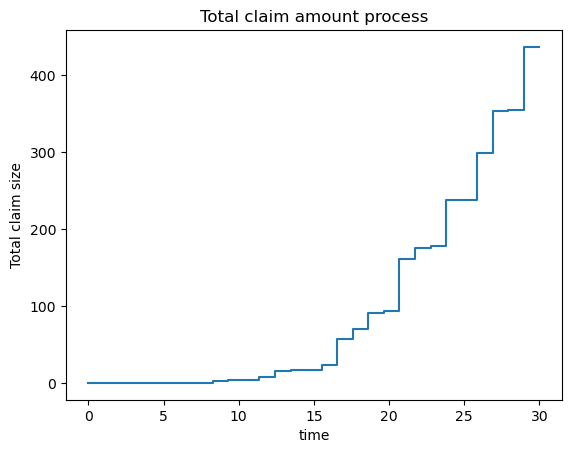

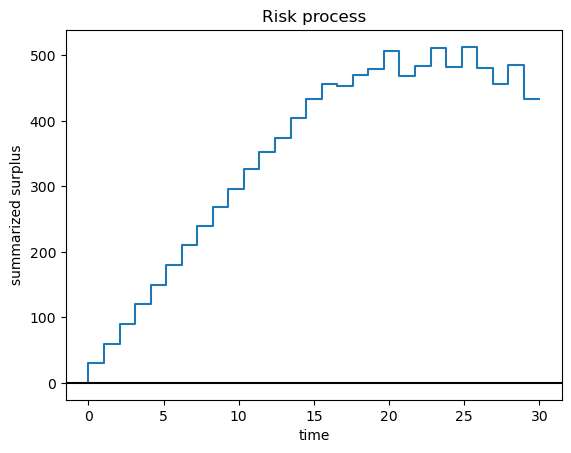

94.58408110515545 mean calculated with first method 112.39297093473661 mean calculated with second method
16381.472222100365 variance calculated with first method 16806.895100517955 variance calculated with second method


In [18]:
import pandas as pd

S = pd.DataFrame()
NT = pd.DataFrame()
N = pd.DataFrame()
X = pd.DataFrame()
U = pd.DataFrame()
lambdas = pd.DataFrame()
tn = 30
c = 30
N = np.zeros((tn, 1))
S = np.zeros((tn, 1))
U = np.zeros((tn, 1))




U[0] = 0
for t in range(1, tn, 1):
            lambdas[0] = 0
            if t>0:
                lambdas[t] = [(t/15)**2]
            
            NT[t] = np.random.poisson(lambdas[t], size=1)
            N[t] = N[t-1] + NT[t]
            X = np.linspace(0, tn, tn)
            
            
            X1 =  np.random.exponential(10)
            S[t] = S[t-1] + NT[t] * X1
            
            U[t] = U[0] + c*t - S[t]
            T1 = np.linspace(0, tn, tn)
            if U[t] <0:
                print("risk has a occured at ", t)
            

plt.step(X, N, label="Lambda = 1")
plt.title('number of claims - Poisson Process')
plt.xlabel('time')
plt.ylabel('Claim numbers')            
plt.show()

plt.title('Total claim amount process')
plt.xlabel('time')
plt.ylabel('Total claim size')            
plt.step(X,S)
plt.show()

plt.step(T1,U)
plt.title('Risk process')
plt.xlabel('time')
plt.ylabel('summarized surplus')   
plt.axhline(y=0, xmin=0, xmax=30, color='black' )
plt.show()

Smean1 = np.mean(S)
Smean2 = np.mean(X1) * np.mean(N)

Svar1 = np.std(S)**2
Svar2 = (np.mean(N) * np.std(X1)**2) + ( np.std(N)**2 * np.mean(X1)**2)

print(Smean1, "mean calculated with first method", Smean2, "mean calculated with second method")
print(Svar1, "variance calculated with first method", Svar2, "variance calculated with second method")



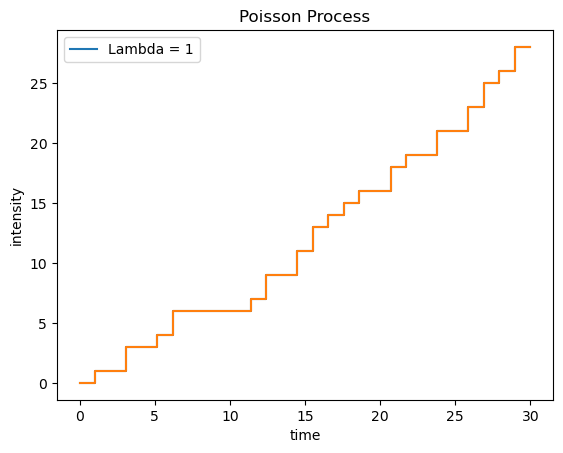

Text(0, 0.5, 'index level')

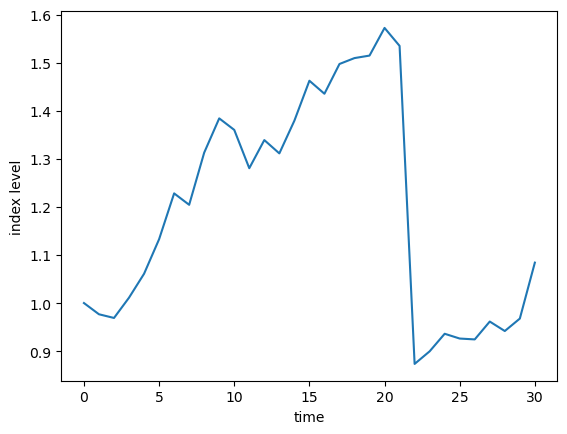

In [21]:
import numpy.random as npr

lambdas = 1
number = 1 
runs = 1
timeframe = 30
iterations = 10000
x0 = 1
dt = 1.0 / timeframe
def poisson_process(lambdas, timeframe):
            X_T = np.random.poisson(lambdas, size=timeframe)
            S = [np.sum(X_T[0:i]) for i in range(timeframe)]
            X = np.linspace(0, timeframe, timeframe)
            graphs = [plt.step(X, S, label="Lambda = %d"%lambdas)[0] for i in range(lambdas)]
            graph = plt.step(X, S, label="Lambda = %d"%lambdas)
            plt.legend(handles=graphs, loc=2)
            plt.title('Poisson Process')
            plt.xlabel('time')
            plt.ylabel('intensity')
poisson_process(lambdas, timeframe)
plt.show()

##################################################################################################
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((timeframe + 1, iterations))
S[0] = x0
sn1 = npr.standard_normal((timeframe + 1, iterations))
sn2 = npr.standard_normal((timeframe + 1, iterations))
poi = npr.poisson(lamb * dt, (timeframe + 1, iterations))
for t in range(1, timeframe + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn1[t]) + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    S[t] = np.maximum(S[t], 0)
plt.plot(S[:, :runs], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')



In [26]:
def Stochastic_process(method, runs, timeframe, increment=None, iterations=None, x0=None):
    r = 0.5
    sigma = 0.3
    theta = 0.2
    kappa = -1.5
    rho = 0.5
    if increment is None:
        increment = 1.0
    else:
        increment = increment
    dt = increment / timeframe
    if runs <= 3 and timeframe <= 20:
        np.random.seed(275)
    elif runs <= 3 and timeframe >= 21 and timeframe <= 50:
        np.random.seed(1023)
    elif runs <= 3 and timeframe >= 51 and timeframe <= 100:
        np.random.seed(31253)
    elif runs <= 3 and timeframe >= 101:
        np.random.seed(789)       
    elif runs >= 4 and runs <= 6 and timeframe <= 20:
        np.random.seed(95)
    elif runs >= 4 and runs <= 6 and timeframe >= 21 and timeframe <=50:
        np.random.seed(320948)
    elif runs >= 4 and runs <= 6 and timeframe >= 51 and timeframe <=100:
        np.random.seed(658)
    elif runs >= 4 and runs <= 6 and timeframe >= 101:
        np.random.seed(34)
    elif runs >= 7 and runs <= 10 and timeframe <= 20:
        np.random.seed(2)
    elif runs >= 7 and runs <= 10 and timeframe >= 21 and timeframe <=50:
        np.random.seed(8)
    elif runs >= 7 and runs <= 10 and timeframe >= 51 and timeframe <=100:
        np.random.seed(101)
    elif runs >= 7 and runs <= 10 and timeframe >= 101:
        np.random.seed(582)      
    elif runs >= 11 and runs <= 16 and timeframe <= 20:
        np.random.seed(2)
    elif runs >= 11 and runs <= 16 and timeframe >= 21 and timeframe <=50:
        np.random.seed(8)
    elif runs >= 11 and runs <= 16 and timeframe >= 51 and timeframe <=100:
        np.random.seed(101)
    elif runs >= 11 and runs <= 16 and timeframe >= 101:
        np.random.seed(582)   
    elif runs >= 16 and runs <= 26 and timeframe <= 20:
        np.random.seed(2)
    elif runs >= 16 and runs <= 26 and timeframe >= 21 and timeframe <=50:
        np.random.seed(8)
    elif runs >= 16 and runs <= 26 and timeframe >= 51 and timeframe <=100:
        np.random.seed(101)
    elif runs >= 16 and runs <= 26 and timeframe >= 101:
        np.random.seed(582)
    else:
        np.random.seed(99)
    
    
    
    
    if method.find("test") != -1 or method.find("test") != -1:
        print("test")
        
        
##################################################################################################
    elif method.find("Random Walk") != -1 or method.find("random walk") != -1 or method.find("Random walk") != -1 or method.find("random Walk") != -1 or method.find("Wiener Process") != -1 or method.find("Wiener process") != -1 or method.find("wiener Process") != -1 or method.find("wiener process") != -1:        
        all_walks = []
        for i in range(runs) :
            random_walk = [0]
            for x in range(timeframe) :
                step = random_walk[-1]
                dice = np.random.randint(1,15)
                if dice <= 3:
                    step = step - 3
                elif dice <= 6 and dice >= 4:
                    step = step - 2
                elif dice <= 8 and dice >= 7:
                    step = step - 1
                elif dice <= 12 and dice >= 10:
                    step = step + 1.5
                elif dice <= 13:
                    step = step + 2.5
                else:
                    step = step + np.random.randint(1,15)
                if np.random.rand() <= 0.001 :
                    step = 0
                random_walk.append(step)
            all_walks.append(random_walk)
        np_aw = np.array(all_walks)
        np_aw_t = np.transpose(np_aw)
        result = "Random walk"
        print(result)
        plt.plot(np_aw_t)
        plt.show()
##################################################################################################
    elif method.find("Stochastic volatility") != -1 or method.find("Stochastic Volatility") != -1 or method.find("stochastic volatility") != -1 or method.find("stochastic Volatility") != -1:     
        corr_mat = np.zeros((2, 2))
        corr_mat[0, :] = [1.0, rho]
        corr_mat[1, :] = [rho, 1.0]
        cho_mat = np.linalg.cholesky(corr_mat)
        cho_mat

        ran_num = npr.standard_normal((2, timeframe + 1, iterations))
        v = np.zeros_like(ran_num[0])
        vh = np.zeros_like(v)
        v[0] = x0
        vh[0] = x0
        for t in range(1, timeframe + 1):
            ran = np.dot(cho_mat, ran_num[:, t, :])
            vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt) * ran[1])
        v = np.maximum(vh, 0)
        S = np.zeros_like(ran_num[0])
        S[0] = x0
        for t in range(1, timeframe + 1):
            ran = np.dot(cho_mat, ran_num[:, t, :])
            S[t] = (S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[0] * np.sqrt(dt)))

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
        ax1.hist(S[-1], bins=50)
        ax1.set_xlabel('index level')
        ax1.set_ylabel('frequency')
        ax1.grid(True)
        ax2.hist(v[-1], bins=50)
        ax2.set_xlabel('volatility')
        ax2.grid(True)
        # tag: sv_hist
        # title: Simulated stochastic volatility model at maturity
        # size: 60
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
        ax1.plot(S[:, :10], lw=1.5)
        ax1.set_ylabel('index level')
        ax1.grid(True)
        ax2.plot(v[:, :10], lw=1.5)
        ax2.set_xlabel('time')
        ax2.set_ylabel('volatility')
        ax2.grid(True)
        result = "Stochastic volatility"
        print(result)        
##################################################################################################        
    elif method.find("Geometric Brownian") != -1 or method.find("geometric brownian") != -1 or method.find("Geometric brownian") != -1 or method.find("geometric Brownian") != -1:
        S = np.zeros((timeframe + 1, iterations))
        S[0] = x0
        for t in range(1, timeframe + 1):
            S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(iterations))
        plt.plot(S[:, :10], lw=1.5)
        plt.ylabel('index level')
        plt.grid(True)
        plt.show()
        result = "Geometric brownian motion process"
        print(result)
##################################################################################################
    elif method.find("square root") != -1 or method.find("Square root") != -1 or method.find("Square Root") != -1 or method.find("square Root") != -1:
        def srd_euler():
            xh = np.zeros((timeframe + 1, iterations))
            x1 = np.zeros_like(xh)
            xh[0] = x0
            x1[0] = x0
            for t in range(1, timeframe + 1):
                xh[t] = (xh[t - 1] + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt) * npr.standard_normal(iterations))
                x1 = np.maximum(xh, 0)
            return x1
        x1 = srd_euler()
        plt.figure(figsize=(10, 6))
        plt.hist(x1[-1], bins=50)
        plt.xlabel('value')
        plt.ylabel('frequency');
        plt.figure(figsize=(10, 6))
        plt.plot(x1[:, :runs], lw=1.5)
        plt.xlabel('time')
        plt.ylabel('index level');
        result = "Square root diffusion - mean reversion process"
        print(result)
##################################################################################################
    elif method.find("Poisson") != -1 or method.find("poisson") != -1:
        def poisson_process(lambdas, number):
            X_T = np.random.poisson(lambdas, size=number)
            S = [np.sum(X_T[0:i]) for i in range(number)]
            X = np.linspace(0, number, number)
            graphs = [plt.step(X, S, label="Lambda = %d"%lambdas)[0] for i in range(lambdas)]
            graph = plt.step(X, S, label="Lambda = %d"%lambdas)
            plt.legend(handles=graph, loc=2)
            plt.title('Poisson Process')
            plt.xlabel('time')
            plt.ylabel('intensity')
        poisson_process(runs, timeframe)
        plt.show()
        result = "Poisson process"
        print(result)
##################################################################################################
    elif method.find("Jump diffusion") != -1 or method.find("jump diffusion") != -1:
        r = 0.05
        sigma = 0.2
        lamb = 0.75
        mu = -0.6
        delta = 0.25
        rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
        S = np.zeros((timeframe + 1, iterations))
        S[0] = x0
        sn1 = npr.standard_normal((timeframe + 1, iterations))
        sn2 = npr.standard_normal((timeframe + 1, iterations))
        poi = npr.poisson(lamb * dt, (timeframe + 1, iterations))
        for t in range(1, timeframe + 1, 1):
            S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
            S[t] = np.maximum(S[t], 0)
        plt.plot(S[:, :runs], lw=1.5)
        plt.xlabel('time')
        plt.ylabel('index level')
        plt.grid(True)
        # tag: jd_paths
        # title: Simulated jump diffusion paths
        # size: 60
        result = "Jump diffusion process"
        print(result)
##################################################################################################
    elif method.find("Martingale") != -1 or method.find("martingale") != -1:
        result = "Martingale process"
        print(result)
##################################################################################################
    elif method.find("Markov") != -1 or method.find("markov") != -1:
        # Different States
        states = ["Rise","Fall","Static"]

# Possible sequences of events
        transitionName = [["SS","SR","SF"],["RR","RS","RF"],["FR","FS","FF"]]

# Transition matrix
        transitionMatrix = [[0.2,0.6,0.2],[0.15,0.5,0.35],[0.05,0.55,0.4]]

        if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
            print("Error! The probablilities for every position must be 1")
    
        def activity_forecast(hours):
    # Lets start with Static State
            activityNow = "Static"
            print("Start state: " + activityNow)
            activityList = [activityNow]
            i = 0
    # To calculate the probability of the activityList
            prob = 1
            while i != hours:
                if activityNow == "Static":
                    change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
                    if change == "SS":
                        prob = prob * 0.2
                        activityList.append("Static")
                        pass
                    elif change == "SR":
                        prob = prob * 0.6
                        activityNow = "Rise"
                        activityList.append("Rise")
                    else:
                        prob = prob * 0.2
                        activityNow = "Fall"
                        activityList.append("Fall")
                elif activityNow == "Rise":
                    change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
                    if change == "RR":
                        prob = prob * 0.15
                        activityList.append("Rise")
                        pass
                    elif change == "RS":
                        prob = prob * 0.5
                        activityNow = "Static"
                        activityList.append("Static")
                    else:
                        prob = prob * 0.35
                        activityNow = "Fall"
                        activityList.append("Fall")
                        "FR","FS","FR"
                elif activityNow == "Fall":
                    change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
                    if change == "FR":
                        prob = prob * 0.05
                        activityNow = "Static"
                        activityList.append("Rise")
                        pass
                    elif change == "FS":
                        prob = prob * 0.55
                        activityNow = "Static"
                        activityList.append("Static")
                    else:
                        prob = prob * 0.4
                        activityNow = "Fall"
                        activityList.append("Fall")
                i += 1  
            print("Possible states: " + str(activityList))
            print("End state after "+ str(hours) + " hours: " + activityNow)
            print("Probability of the possible sequence of states: " + str(prob))

#Forcast for the next 5 hours
        activity_forecast(5)

        def activity_forecast(hours):
            activityNow = "Static"
            activityList = [activityNow]
            i = 0
            prob = 1
            while i != hours:
                if activityNow == "Static":
                    change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
                    if change == "SS":
                        prob = prob * 0.2
                        activityList.append("Static")
                        pass
                    elif change == "SR":
                        prob = prob * 0.6
                        activityNow = "Rise"
                        activityList.append("Rise")
                    else:
                        prob = prob * 0.2
                        activityNow = "Fall"
                        activityList.append("Fall")
                elif activityNow == "Rise":
                    change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
                    if change == "RR":
                        prob = prob * 0.15
                        activityList.append("Rise")
                        pass
                    elif change == "RS":
                        prob = prob * 0.5
                        activityNow = "Static"
                        activityList.append("Static")
                    else:
                        prob = prob * 0.35
                        activityNow = "Fall"
                        activityList.append("Fall")
                        "FR","FS","FR"
                elif activityNow == "Fall":
                    change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
                    if change == "FR":
                        prob = prob * 0.05
                        activityNow = "Static"
                        activityList.append("Rise")
                        pass
                    elif change == "FS":
                        prob = prob * 0.55
                        activityNow = "Static"
                        activityList.append("Static")
                    else:
                        prob = prob * 0.4
                        activityNow = "Fall"
                        activityList.append("Fall")
                i += 1    
            return activityList

        list_activity = []
        count = 0

        for iterations in range(1,10000):
                list_activity.append(activity_forecast(2))
  
        print(list_activity[0:5])
#we can view the first 5 outputs

        for smaller_list in list_activity:
            if(smaller_list[2] == "Rise"):
                count += 1
        
#what is the probability of starting with static and ending with Rise.
        percentage = (count/10000) * 100
        print("The probability of starting at state:'Static' and ending at state:'Rise'= " + str(percentage) + "%")
        result = "Markov process"
        print(result)
    
    elif method.find("Levy") != -1 or method.find("levy") != -1:
        result = "Levy process"
        print(result)
    
    elif method.find("Gaussian") != -1 or method.find("gaussian") != -1:
        result = "Gaussian process"
        print(result)
    
    elif method.find("Renewal") != -1 or method.find("renewal") != -1:
        result = "Renewal process"
        print(result)
    
    elif method.find("Branching") != -1 or method.find("branching") != -1:
        result = "Branching process"
        print(result)
    
    else:
        result = "intet fundet"
        print(result)
    

        # tag: sv_paths
        # title: Simulated stochastic volatility model paths
        # size: 60
    return result

Square root diffusion - mean reversion process


'Square root diffusion - mean reversion process'

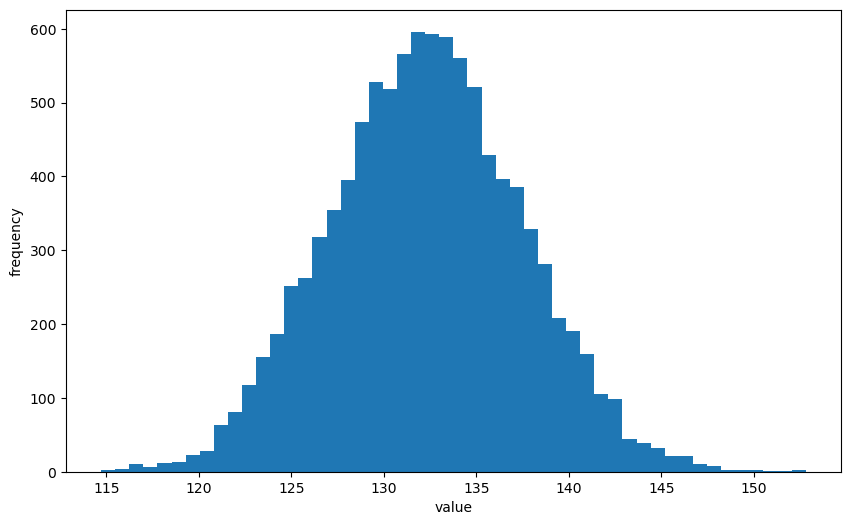

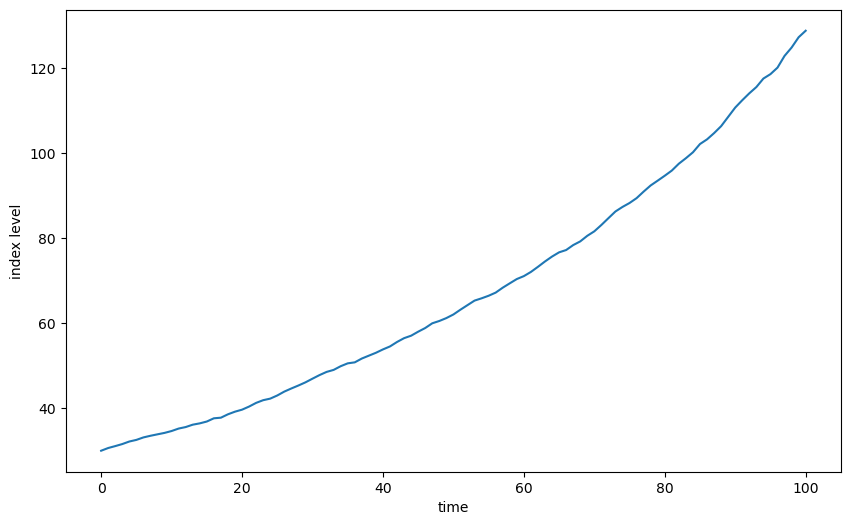

In [27]:
Stochastic_process("square root", 1, 100, 1.0, 10000, 30) #method, runs, timeframe, increments, iterations=None, x0=None